# Détection de tweet suspect

#### Dans ce travail, il vous est demandé de proposer un modèle de machine leaning pour permettant de classifier si un discours est suspet (menaces, terrorismes, intimidation...) ou non. Vous devriez mettre en oeuvre les differentes techniques vues au cours (pre-trainement, embedding, classification...).

#### Dataset labelisé : Lien de téléchargement

#### Label	Signification
#### 0	       Non suspect
#### 1	       Suspect (menaces, terrorismes, intimidation...)


In [3]:
%pip install --upgrade spacy

  Using cached spacy-3.8.2-cp311-cp311-win_amd64.whl.metadata (27 kB)
  Using cached thinc-8.3.2-cp311-cp311-win_amd64.whl.metadata (15 kB)
  Using cached blis-1.0.1-cp311-cp311-win_amd64.whl.metadata (7.8 kB)
  Using cached numpy-2.0.2-cp311-cp311-win_amd64.whl.metadata (59 kB)
Using cached spacy-3.8.2-cp311-cp311-win_amd64.whl (12.2 MB)
Using cached thinc-8.3.2-cp311-cp311-win_amd64.whl (1.5 MB)
Using cached numpy-2.0.2-cp311-cp311-win_amd64.whl (15.9 MB)
Using cached blis-1.0.1-cp311-cp311-win_amd64.whl (6.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Attempting uninstall: blis
    Found existing installation: blis 0.7.11
    Uninstalling blis-0.7.11:
      Successfully uninstalled blis-0.7.11
  Attempting uninstall: thinc
    Found existing installation: thinc 8.2.4
    Uninstalling thinc-8.2.4:
      Successfully uninstalled thinc-8.2.4
  Attempting uninstall: spacy
   

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  You can safely remove it manually.
  You can safely remove it manually.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fr-core-news-sm 3.7.0 requires spacy<3.8.0,>=3.7.0, but you have spacy 3.8.2 which is incompatible.
streamlit 1.35.0 requires numpy<2,>=1.19.3, but you have numpy 2.0.2 which is incompatible.
tensorflow-intel 2.17.0 requires numpy<2.0.0,>=1.23.5; python_version <= "3.11", but you have numpy 2.0.2 which is incompatible.
torchvision 0.19.0 requires numpy<2, but you have numpy 2.0.2 which is incompatible.

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --

In [1]:
#Importation de packages
import pandas as pd
import spacy

In [2]:
#Importation du modele anglais de spacy
nlp = spacy.load("en_core_web_sm")

In [4]:
#Importer le fichier csv
df= pd.read_csv('C:/Users/pc/Desktop/Master data mining IA/UVBF/24- NLP2/tps/Exercice embeddings et classification/tweets_suspect.csv', sep=',')
#df= pd.read_csv('tweets_suspect.csv', sep=',')

print(df.head())
print()
print(df.tail())

                                             message  label
0  @switchfoot http://twitpic.com/2y1zl - Awww, t...      1
1  is upset that he can't update his Facebook by ...      1
2  @Kenichan I dived many times for the ball. Man...      1
3    my whole body feels itchy and like its on fire       0
4  @nationwideclass no, it's not behaving at all....      1

                                                 message  label
59995  Really wants to go and see 17 again, because Z...      1
59996                              @krissa22 Thank you!       1
59997                                   dreaming of you       1
59998     @TheEllenShow I saw a clip online!  good show!      1
59999             @msdivineknight k hun, no worries!  xx      1


## Exploratory Data Analysis (EDA)

In [5]:
#Description de df
df.describe()

,label
count,60000.000000
mean,0.897583
std,0.303198
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   message  60000 non-null  object
 1   label    60000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 937.6+ KB


In [7]:
df.dtypes

message    object
label       int64
dtype: object

In [8]:
#Verification valeurs nulles
df.isnull().sum()

message    0
label      0
dtype: int64

In [9]:
#Proportion des labels
df['label'].value_counts('0')

label
1    0.897583
0    0.102417
Name: proportion, dtype: float64

### Environ 90% de tweets suspect et 10% de tweets non suspect dans notre dataset

<Axes: >

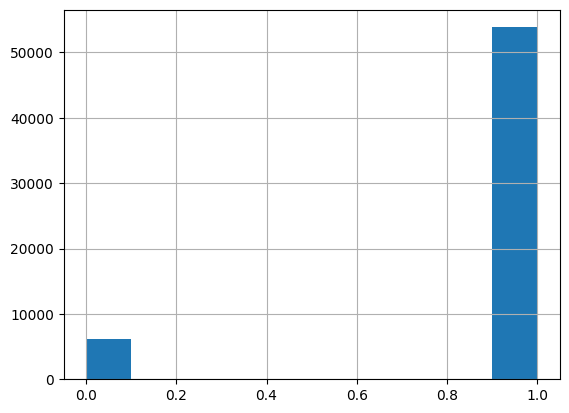

In [ ]:
#Analyse univariee
df['label'].hist()


## La distribution des labels est tres debalancee

### Lorsque la distribution des données est déséquilibrée, les mesures de performance traditionnelles comme l’exactitude peuvent être trompeuses. Voici quelques métriques plus appropriées pour évaluer les modèles dans ce contexte que nous allons utiliser pour notre cas:

### Matrice de confusion:

### Fournit une vue d’ensemble des prédictions correctes et incorrectes, en distinguant les vrais positifs (TP), vrais négatifs (TN), faux positifs (FP) et faux négatifs (FN).

### Précision (Precision):

### Preˊcision=TP+FPTP​

### Indique la proportion de prédictions positives correctes parmi toutes les prédictions positives.

### Rappel (Recall) ou Sensibilité:

### Rappel=TP+FNTP​

### Mesure la capacité du modèle à identifier correctement les instances positives.

### Score F1:

### Score F1=2×Preˊcision+RappelPreˊcision×Rappel​

### Harmonie moyenne de la précision et du rappel, utile lorsque vous avez besoin d’un équilibre entre les deux.

### Courbe ROC et AUC (Area Under the Curve):

### La courbe ROC trace le taux de vrais positifs (TPR) contre le taux de faux positifs (FPR) à différents seuils de classification.
### L’AUC mesure la capacité du modèle à distinguer entre les classes.

### Métrique de G-Mean:

### G-Mean=Sensibiliteˊ×Speˊcificiteˊ​

### Évalue l’équilibre entre la sensibilité et la spécificité.

### Ces métriques fournissent une image plus claire des performances du modèle dans toutes les classes, surtout lorsque les classes sont déséquilibrées123.


In [11]:
#df['message']
texte= df['message'].to_string()
texte[:1000]

"0        @switchfoot http://twitpic.com/2y1zl - Awww, t...\n1        is upset that he can't update his Facebook by ...\n2        @Kenichan I dived many times for the ball. Man...\n3          my whole body feels itchy and like its on fire \n4        @nationwideclass no, it's not behaving at all....\n5                            @Kwesidei not the whole crew \n6                                              Need a hug \n7        @LOLTrish hey  long time no see! Yes.. Rains a...\n8                     @Tatiana_K nope they didn't have it \n9                                @twittera que me muera ? \n10             spring break in plain city... it's snowing \n11                              I just re-pierced my ears \n12       @caregiving I couldn't bear to watch it.  And ...\n13       @octolinz16 It it counts, idk why I did either...\n14       @smarrison i would've been the first, but i di...\n15       @iamjazzyfizzle I wish I got to watch it with ...\n16       Hollis' death scene will hurt 

# Premiere approche

## Utilisation du modele preentraine Roberta base for sentiment analysing

In [12]:
#Importation de librairie du modele roberta
from transformers import AutoModelForSequenceClassification
from transformers import TFAutoModelForSequenceClassification
from transformers import AutoTokenizer, AutoConfig
import numpy as np
from scipy.special import softmax


In [13]:
#Pretraitement du text
# Preprocess text (username and link placeholders)
def preprocess(text):
    new_text = []
    for t in text.split(" "):
        t = '@user' if t.startswith('@') and len(t) > 1 else t
        t = 'http' if t.startswith('http') else t
        new_text.append(t)
    return " ".join(new_text)


In [ ]:
#Instanciation du modele
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment-latest"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
config = AutoConfig.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)


c:\ProgramData\anaconda3\lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model)

In [ ]:
#finetune the model with the dataset
# model.train_model(df)

#Utilisation du modele pour analyser le sentiment de chaque tweet
# model.eval_model(df)

#Utilisation du modele pour analyser le sentiment de chaque tweet
# model.predict(df)

#Prédiction du sentiment



In [15]:
#Chargement du text

text = texte[:1000]
text = preprocess(text)
encoded_input = tokenizer(text, return_tensors='pt')
output = model(**encoded_input)
scores = output[0][0].detach().numpy()
scores = softmax(scores)


In [16]:
# # TF
ranking = np.argsort(scores)
ranking = ranking[::-1]
for i in range(scores.shape[0]):
    l = config.id2label[ranking[i]]
    s = scores[ranking[i]]
    print(f"{i+1}) {l} {np.round(float(s), 4)}")


1) negative 0.684
2) neutral 0.2857
3) positive 0.0303


# Deuxieme approche

In [17]:
#Nettoyage du text
import re
import nltk
from nltk.corpus import stopwords


In [20]:
# Télécharger les stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:
def clean_tweet(tweet):
    # Supprimer les mentions (@)
    tweet = re.sub(r'@\w+', '', tweet)
    # Supprimer les hashtags (#)
    tweet = re.sub(r'#\w+', '', tweet)
    # Supprimer les URL
    tweet = re.sub(r'http\S+|www\S+|https\S+', '', tweet, flags=re.MULTILINE)
    # Supprimer les caractères spéciaux et les chiffres
    tweet = re.sub(r'\W', ' ', tweet)
    tweet = re.sub(r'\d', '', tweet)
    # Supprimer les espaces supplémentaires
    tweet = re.sub(r'\s+', ' ', tweet).strip()
    # Convertir en minuscules
    tweet = tweet.lower()
    # Supprimer les stopwords
    tweet = ' '.join([word for word in tweet.split() if word not in stop_words])
    return tweet


In [21]:
# Exemple d'utilisation

tweet = df['message'].to_string()
cleaned_tweet = clean_tweet(tweet)
print(cleaned_tweet)

upset update facebook dived many times ball man whole body feels itchy like fire behaving whole crew need hug hey long time see yes rains nope que muera spring break plain city snowing pierced ears bear watch counts idk either would first di wish got watch hollis death scene hurt severely w file taxes ahh ive always wanted see rent lov oh dear drinking ou day one friend called asked meet baked cake ated week going hoped blagh class tomorrow hate call wake people going cry sleep watchi im sad miss lilly ooooh lol leslie ok meh almost lover exception hacked account aim want go promote gear gr thought sleeping option tomorrow awe love cry asian eyes sleep night ok sick spent hour sitting ill tell ya story later sorry bed time came gmt ht either depressing bed class work gym really feel like getting today reason teardrops guitar sad sad sad know hate thi awww soo wish falling asleep heard tracy gi yay happy job checked user timeline blackberry oh man ironing fave top strangely sad lilo sam

In [22]:
#cleaned_tweet[:100]
nlp.max_length = 2000000 # or even higher

In [23]:
#Embbedings du texte nettoye
doc= nlp(cleaned_tweet)
vect_text = doc.vector

In [24]:
vect_text

array([ 0.00285044, -0.5108987 ,  0.05722056,  0.06659719, -0.13166876,
       -0.21556932,  0.14056638,  0.40990505,  0.15290053, -0.15498084,
        0.10038901, -0.12212425, -0.35017794, -0.38620356, -0.183427  ,
        0.18481132, -0.08787951, -0.33298165, -0.47450513, -0.24614392,
       -0.14136575,  0.6823907 , -0.42702714, -0.13684359,  0.10860892,
       -0.21012716,  0.48142147,  0.5654201 ,  0.09570718,  0.13190682,
       -0.04463499,  0.00555548, -0.30884075,  0.06222848,  0.06342027,
       -0.1702192 ,  0.22993517, -0.01115612, -0.08032136,  0.06577682,
       -0.41284448, -0.03223283,  0.01578088,  0.41511443, -0.02617903,
       -0.07176423,  0.27051282,  0.0415307 , -0.07214368,  0.05420579,
       -0.53733253,  0.07028529, -0.0432181 , -0.37279862, -0.41147205,
        0.06285281,  0.54692924,  0.06708814,  0.0064312 , -0.15286535,
       -0.30469418,  0.01461485, -0.04868383, -0.09644663, -0.16199097,
       -0.02713615,  0.10550635,  0.0918216 ,  0.15707633, -0.07

In [25]:
vect_text.shape

(96,)

# Modeles de classification de tweet

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Example: Preprocessing text data
vectorizer = TfidfVectorizer(stop_words='english')

In [27]:
#Faisons la classification

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import roc_curve, roc_auc_score


In [28]:
#Jeu de donnees a readapter

#X = vect_text
X = vectorizer.fit_transform(df['message'])
y = df['label']


In [29]:
#Train test split
# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
#Definir et entrainer le modele
# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

# Decision Tree
dec_tree = DecisionTreeClassifier()
dec_tree.fit(X_train, y_train)
y_pred_dec_tree = dec_tree.predict(X_test)

# K-Nearest Neighbors
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)


In [31]:
#Calcul des performances
# Fonction pour afficher les métriques de performance
def print_metrics(y_test, y_pred, model_name):
    print(f"Performance du modèle {model_name}:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print(f"Precision: {precision_score(y_test, y_pred):.2f}")
    print(f"Recall: {recall_score(y_test, y_pred):.2f}")
    print(f"F1 Score: {f1_score(y_test, y_pred):.2f}")
    print(classification_report(y_test, y_pred))
    print("\n")

# Afficher les performances pour chaque modèle
print_metrics(y_test, y_pred_log_reg, "Logistic Regression")
print_metrics(y_test, y_pred_dec_tree, "Decision Tree")
print_metrics(y_test, y_pred_knn, "K-Nearest Neighbors")


Performance du modèle Logistic Regression:
Accuracy: 0.94
Precision: 0.94
Recall: 1.00
F1 Score: 0.97
              precision    recall  f1-score   support

           0       0.99      0.46      0.63      1222
           1       0.94      1.00      0.97     10778

    accuracy                           0.94     12000
   macro avg       0.97      0.73      0.80     12000
weighted avg       0.95      0.94      0.94     12000



Performance du modèle Decision Tree:
Accuracy: 0.98
Precision: 0.99
Recall: 0.99
F1 Score: 0.99
              precision    recall  f1-score   support

           0       0.94      0.89      0.91      1222
           1       0.99      0.99      0.99     10778

    accuracy                           0.98     12000
   macro avg       0.97      0.94      0.95     12000
weighted avg       0.98      0.98      0.98     12000



Performance du modèle K-Nearest Neighbors:
Accuracy: 0.90
Precision: 0.90
Recall: 1.00
F1 Score: 0.95
              precision    recall  f1-scor

In [32]:
#Comparer les performances
import pandas as pd

# Dictionnaire pour stocker les résultats
results = {
    "Model": ["Logistic Regression", "Decision Tree", "K-Nearest Neighbors"],
    "Accuracy": [accuracy_score(y_test, y_pred_log_reg), accuracy_score(y_test, y_pred_dec_tree), accuracy_score(y_test, y_pred_knn)],
    "Precision": [precision_score(y_test, y_pred_log_reg), precision_score(y_test, y_pred_dec_tree), precision_score(y_test, y_pred_knn)],
    "Recall": [recall_score(y_test, y_pred_log_reg), recall_score(y_test, y_pred_dec_tree), recall_score(y_test, y_pred_knn)],
    "F1 Score": [f1_score(y_test, y_pred_log_reg), f1_score(y_test, y_pred_dec_tree), f1_score(y_test, y_pred_knn)]
}

# Créer le DataFrame
df_results = pd.DataFrame(results)

# Afficher le DataFrame
print(df_results)


                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.944750   0.942515  0.999443  0.970145
1        Decision Tree  0.983083   0.987103  0.994155  0.990616
2  K-Nearest Neighbors  0.902750   0.902370  0.999907  0.948638


In [33]:
df_results.to_csv('models_performance.csv', index=False)


In [34]:
#Predire les probabilite et calcul des metrics ROC
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

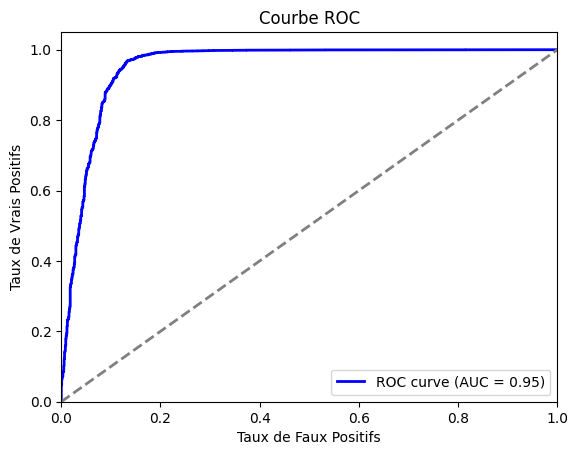

In [35]:
#Tracer la courbe ROC
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de Faux Positifs')
plt.ylabel('Taux de Vrais Positifs')
plt.title('Courbe ROC')
plt.legend(loc="lower right")
plt.show()


In [36]:
#prediction
pred = log_reg.predict(X_test)
pred_proba = log_reg.predict_proba(X_test)[:, 1]

#Afficher les predictions
print('log_reg prediction: ',pred)
print('log_reg proba: ',pred_proba)

log_reg prediction:  [1 0 1 ... 1 1 1]
log_reg proba:  [0.77893882 0.0928946  0.9251452  ... 0.95110151 0.96122709 0.94384853]
